In [1]:
from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition


In [2]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

In [3]:
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Amitabh 9\scikit_learn_data


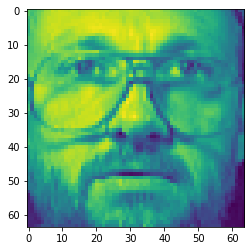

In [15]:
v=faces[0].reshape(64,64)
plt.imshow(v)

In [16]:
# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


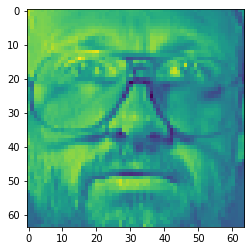

In [18]:
v=faces_centered[0].reshape(64,64)
plt.imshow(v)

In [27]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i+1 )
        vmax = max(comp.max(), -comp.min())
        plt.imshow(
            comp.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.0)


In [33]:
# problem, and whether the transformer uses the clustering API.
estimators = [
    (
        "Eigenfaces - PCA using randomized SVD",
        decomposition.PCA(
            n_components=n_components, svd_solver="randomized", whiten=True
        ),
    
    (
        "Non-negative components - NMF",
        decomposition.NMF(n_components=n_components, init="nndsvda", tol=5e-3),
        False,
    ),
    (
        "Independent components - FastICA",
        decomposition.FastICA(n_components=n_components, whiten=True),
        True,
    )]

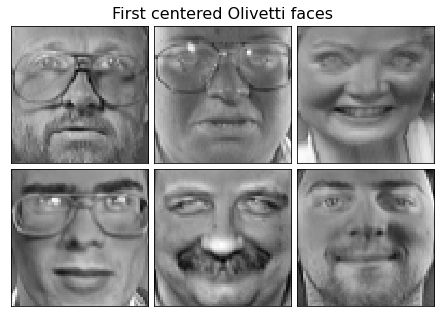

In [34]:
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

Extracting the top 6 Eigenfaces - PCA using randomized SVD...
Extracting the top 6 Non-negative components - NMF...
Extracting the top 6 Independent components - FastICA...


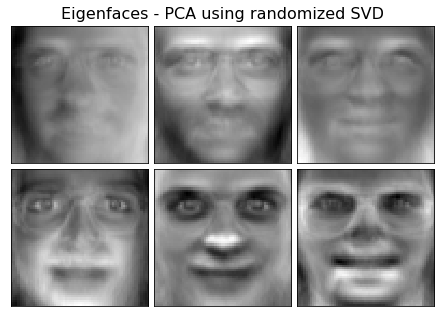

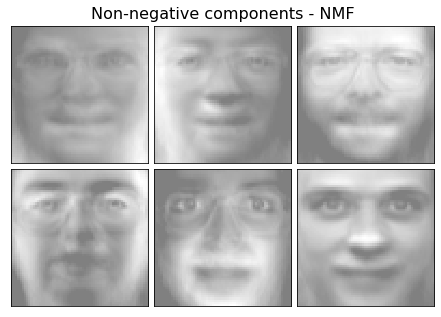

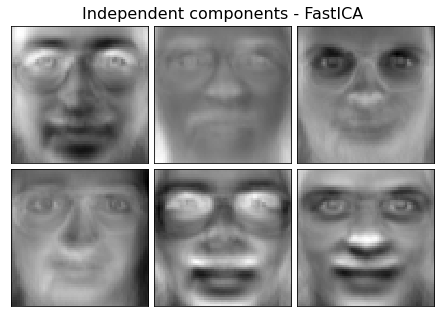

In [38]:
for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
   
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
   
    
    if hasattr(estimator, "cluster_centers_"):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_

    # Plot an image representing the pixelwise variance provided by the
    # estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
    # via the PCA decomposition, also provides a scalar noise_variance_
    # (the mean of pixelwise variance) that cannot be displayed as an image
    # so we skip it.
    if (
        hasattr(estimator, "noise_variance_") and estimator.noise_variance_.ndim > 0
    ):  # Skip the Eigenfaces case
        plot_gallery(
            "Pixelwise variance",
            estimator.noise_variance_.reshape(1, -1),
            n_col=1,
            n_row=1,
        )
    plot_gallery(
        (name), components_[:n_components]
    )

plt.show()
